In [3]:
import pandas as pd
import vertica_python
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import os
import scipy
from scipy.stats import ttest_ind
import scipy.stats as stats

In [4]:
username = os.getenv('VERTICA_USERNAME')
password = os.getenv('VERTICA_PASSWORD')
conn_info = {'host': 'warehouse.analytics.edx.org',
             'port': 5433,
             'user': username,
             'password': password,
             'database': 'warehouse',
             'read_timeout': 600,
             'unicode_error': 'strict',
             'ssl': False}

# Queries
* * *

In [32]:
programs_query = """

select 
a.*, b.*, 
case when c.program_type is null then 'non-program' else c.program_type end as program_type
from business_intelligence.course_stats_summary a
join business_intelligence.course_master b
ON a.course_id = b.course_id
left join production.d_program_course c
on a.course_id = c.course_id
join business_intelligence.course_subject_deduped d
on a.course_id = d.course_id
where sum_enrolls_vtr > 5000
"""

In [33]:
connection = vertica_python.connect(**conn_info)

cur = connection.cursor('dict')
cur.execute(programs_query)
extract = cur.fetchall()
programs_df = pd.DataFrame(extract)

connection.close()

In [34]:
programs_df

,cnt_paid_enrollments,content_language,course_about_url,course_announcement_date,course_end_date,course_id,course_name,course_number,course_partner,course_reporting_type,...,sum_certificates,sum_completions,sum_donations_bookings,sum_enrolls,sum_enrolls_vtr,sum_reg_code_bookings,sum_seat_bookings,sum_unenrolls,sum_verifications,vtr
0,0.0,en-us,https://www.edx.org/course/quantum-mechanics-q...,2013-07-11,2013-10-20,BerkeleyX/CS-191x/2013_August,Quantum Mechanics and Quantum Computation,BerkeleyX+CS-191x,BerkeleyX,mooc,...,905.0,905.0,125.00,50939,50939,0.00,0.00,10843,0,0E-18
1,16.0,en-us,https://www.edx.org/course/picture-dorian-gray...,2014-11-10,2016-04-29,BerkeleyX/ColWri3.4x/1T2015,"""The Picture of Dorian Gray"" by Wilde: Berkele...",BerkeleyX+ColWri3.4x,BerkeleyX,mooc,...,322.0,322.0,125.00,7778,6821,0.00,750.00,2263,15,0.002199091042369154
2,0.0,en-us,https://www.edx.org/course/cyber-physical-syst...,2014-03-07,2014-06-24,BerkeleyX/EECS149.1x/2T2014,Cyber-Physical Systems,BerkeleyX+EECS149.1x,BerkeleyX,mooc,...,354.0,354.0,40.00,19201,19201,0.00,0.00,5621,0,0E-18
3,1343.0,en-us,https://www.edx.org/course/introduction-statis...,2014-02-04,2014-03-31,BerkeleyX/Stat_2.1x/1T2014,Introduction to Statistics: Descriptive Statis...,BerkeleyX+Stat_2.1x,BerkeleyX,mooc,...,1727.0,1727.0,554.00,92741,36131,0.00,30515.00,25202,1361,0.037668484127203786
4,470.0,en-us,https://www.edx.org/course/introduction-statis...,2014-04-01,2014-06-01,BerkeleyX/Stat_2.2x/1T2014,Introduction to Statistics: Probability,BerkeleyX+Stat_2.2x,BerkeleyX,mooc,...,867.0,867.0,236.00,50196,12360,0.00,11660.00,12831,467,0.037783171521035599
5,380.0,en-us,https://www.edx.org/course/introduction-statis...,2014-02-03,2014-07-09,BerkeleyX/Stat_2.3x/2T2014,Introduction to Statistics: Inference,BerkeleyX+Stat_2.3x,BerkeleyX,mooc,...,673.0,673.0,331.00,44864,16181,0.00,9080.00,11220,379,0.023422532599962919
6,0.0,en-us,https://www.edx.org/course/evolving-universe-c...,2014-03-27,2014-07-08,CaltechX/Ay1001x/2T2014,The Evolving Universe,CaltechX+Ay1001x,CaltechX,mooc,...,363.0,363.0,69.00,13608,13608,0.00,0.00,4762,0,0E-18
7,28.0,en-us,https://www.edx.org/course/preparing-ap-comput...,2014-09-10,2015-08-01,CooperUnion/CS.1x/1T2015,Preparing for the AP* Computer Science A Exam ...,CooperUnion+CS.1x,CooperUnion,mooc,...,214.0,214.0,20.00,16450,10911,0.00,950.00,5383,27,0.002474566950783613
8,0.0,en-us,https://www.edx.org/course/relativity-astrophy...,2013-10-09,2014-03-31,CornellX/Astro2290x/1T2014,Relativity and Astrophysics,CornellX+Astro2290x,CornellX,mooc,...,712.0,712.0,230.00,40947,40947,0.00,0.00,14769,0,0E-18
9,0.0,en-us,https://www.edx.org/course/wiretaps-big-data-p...,2013-11-04,2014-05-11,CornellX/ENGRI1280x/1T2014,Wiretaps to Big Data: Privacy and Surveillance...,CornellX+ENGRI1280x,CornellX,mooc,...,391.0,391.0,198.00,40470,40470,0.00,0.00,14376,0,0E-18


In [35]:
programs_df['vtr']=programs_df.vtr.astype('float64')*100.0
programs_df['sum_bookings']=programs_df.sum_bookings.astype('float64')
programs_df_filtered = programs_df[programs_df.vtr > 0]

In [45]:
programs_df_filtered.course_subject.unique()

array(['Humanities', 'Data Analysis & Statistics', 'Computer Science',
       'Ethics', 'Biology & Life Sciences', 'Architecture',
       'Art & Culture', 'Health & Safety', 'Math', 'Chemistry',
       'Business & Management', 'Electronics', 'Music',
       'Energy & Earth Sciences', 'Physics', 'Communication', 'History',
       'Education & Teacher Training', 'Social Sciences', 'Engineering',
       'Economics & Finance', 'Design', 'Philosophy & Ethics',
       'Food & Nutrition', 'Law', 'Environmental Studies'], dtype=object)

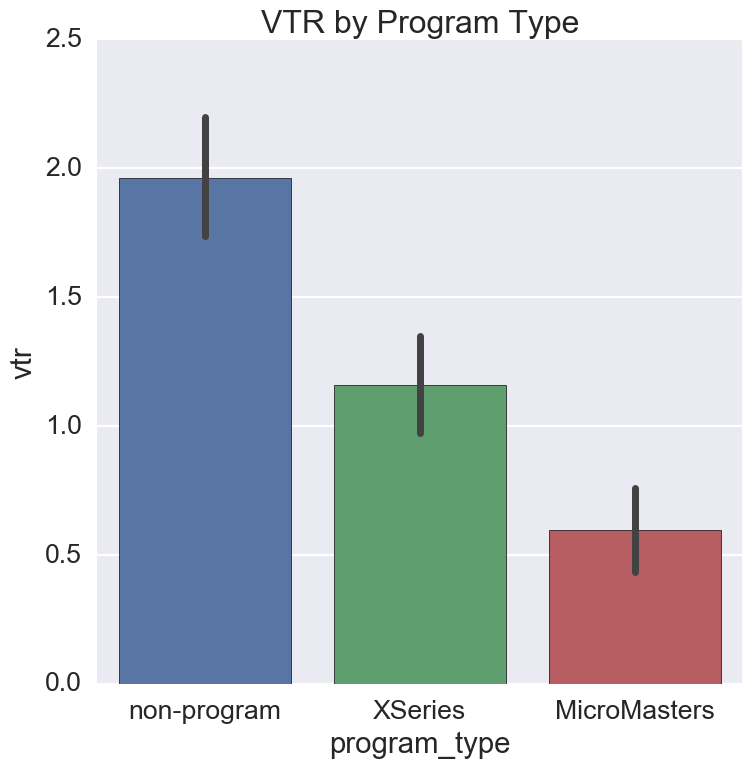

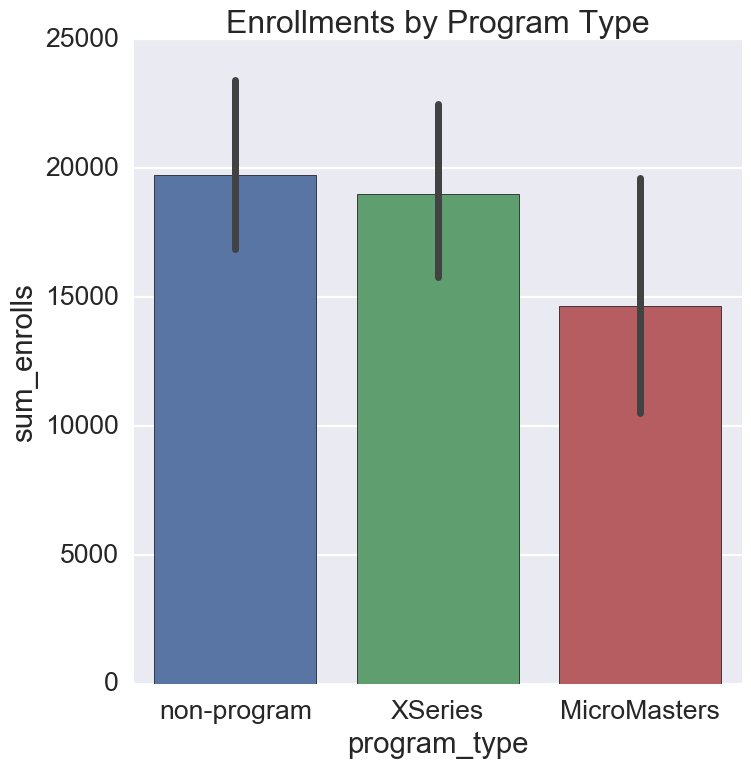

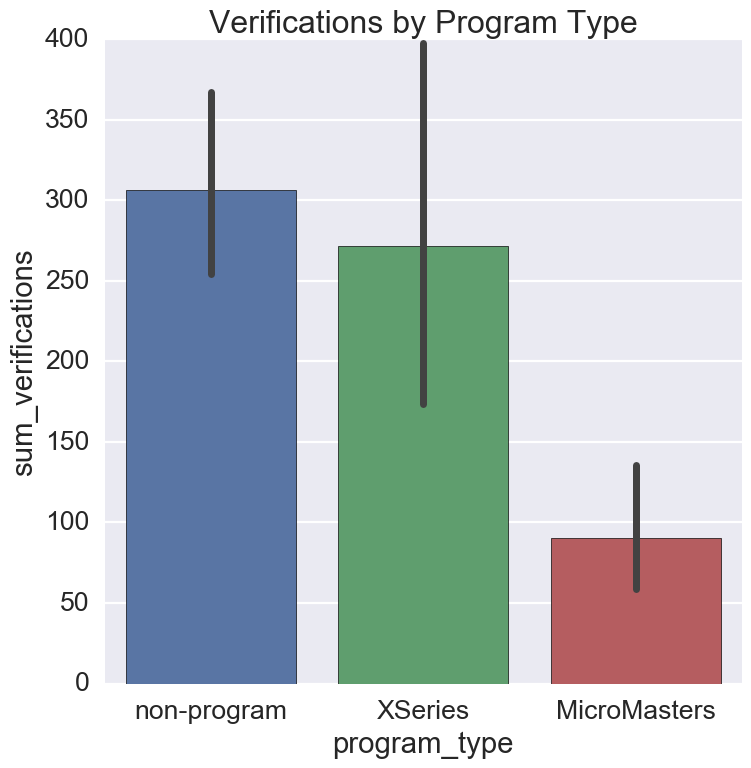

In [54]:
sns.set_context("poster", font_scale=1.2)
ax = sns.factorplot(data=programs_df_filtered, 
               x='program_type', y='vtr', kind='bar', size = 8)
ax.set(title = 'VTR by Program Type')
ax = sns.factorplot(data=programs_df_filtered, 
               x='program_type', y='sum_enrolls', kind='bar', size = 8)
ax.set(title = 'Enrollments by Program Type')
ax = sns.factorplot(data=programs_df_filtered, 
               x='program_type', y='sum_verifications', kind='bar', size = 8)
ax.set(title = 'Verifications by Program Type')

In [8]:
enrollments_quarterly_df.head()
enrollments_quarterly_df['is_microsoft'] = enrollments_quarterly_df.course_id.str.contains('Microsoft')
enrollments_quarterly_df['vtr'] = enrollments_quarterly_df.num_verifs*100.0/enrollments_quarterly_df.num_enrolls

In [9]:
plot_list = [
'num_enrolls',
'num_verifs',
'vtr'  
]
order_list = ['2016_Q1', '2016_Q2', '2016_Q3', '2016_Q4', '2017_Q1']

# Overall Perf
#### Note on how to read these plots: bar height represents mean, ends of the black line represent the 5th and 95th percentile confidence interval. 
#### In general, overlapping confidence intervals = not a statisically significant difference
* * *

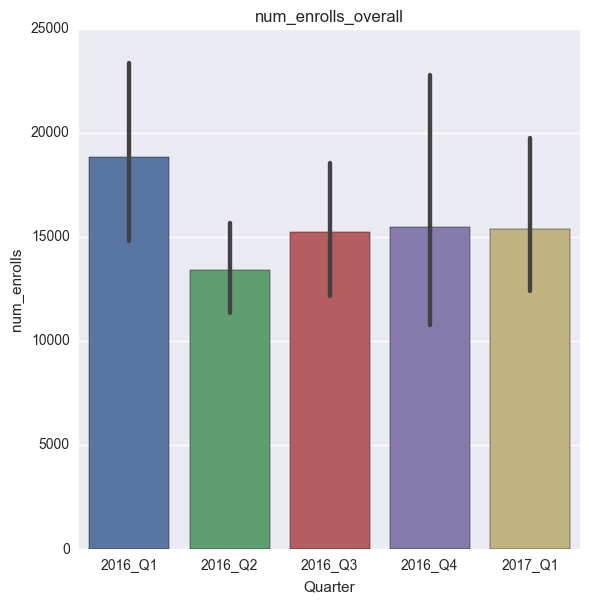

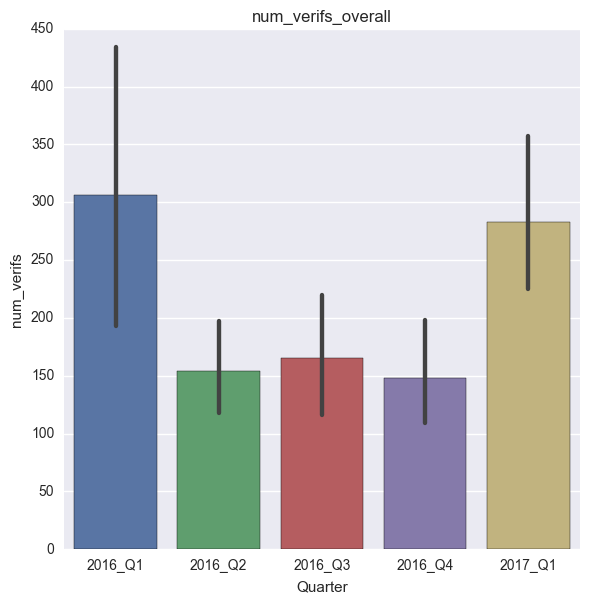

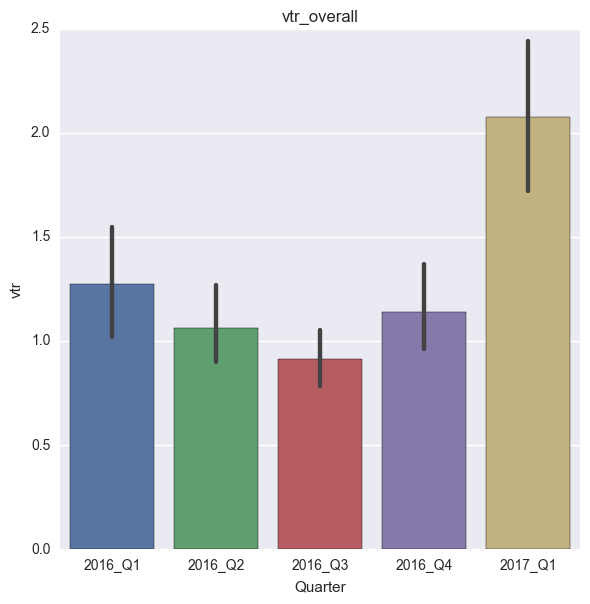

In [305]:
generate_plots()

## Only clear significance is in VTR increase in 2017 Q1.
## Run a quick one-way ANOVA to verify...

In [306]:
run_stats('enrolls', 'anova')

F_onewayResult(statistic=0.43625204314428451, pvalue=0.78247764688058796)

In [307]:
run_stats('verifs', 'anova')

F_onewayResult(statistic=5.5348499164307281, pvalue=0.00021230620652513301)

In [308]:
print run_stats('verifs', 't', [0,1])
print run_stats('verifs', 't', [1,4])

Ttest_indResult(statistic=2.8650914635639362, pvalue=0.0044858889512847935)
Ttest_indResult(statistic=-3.3467779804795743, pvalue=0.00090714041929200581)


#### Just kidding, Q2 2016 is low for verifications compared with Q1 2016 and Q1 2017

In [309]:
run_stats('vtr', 'anova')

F_onewayResult(statistic=13.350924287048471, pvalue=1.5111580538054986e-10)

* * *
# Split by Microsoft
### Are Microsoft courses performing disproportionately better than other course offerings?
* * *

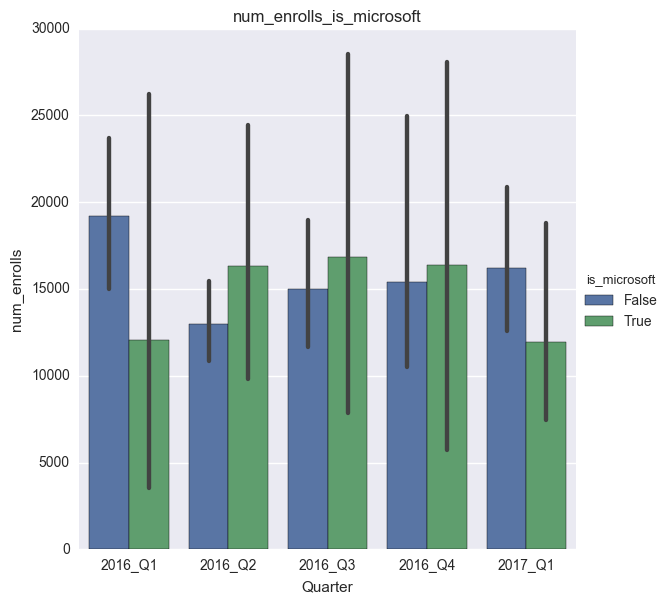

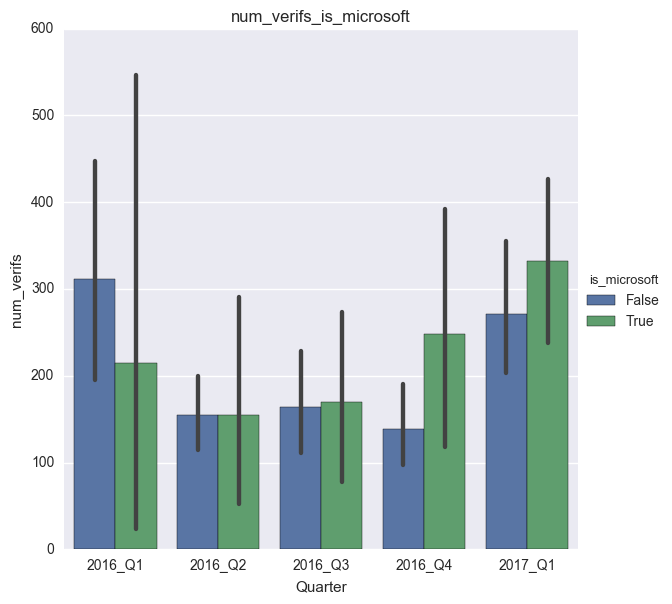

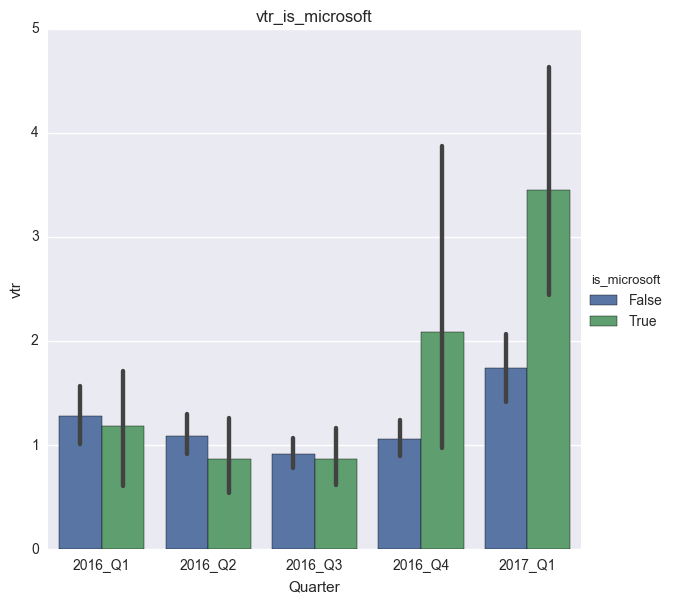

In [310]:
generate_plots('is_microsoft')

# Microsoft courses have better VTR, but in general perform equally with the rest of our offerings.

* * *
# Split by Pacing Type
### Is there a difference in key metrics across self serve vs instructor led?
* * *

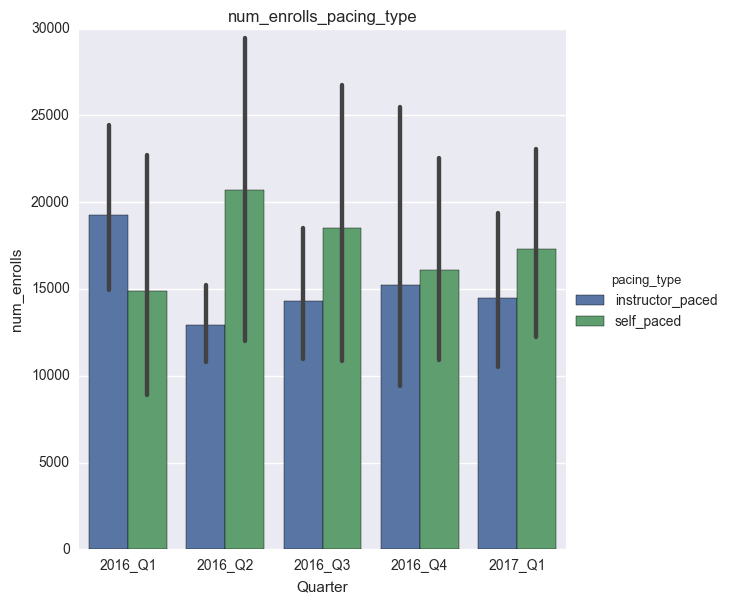

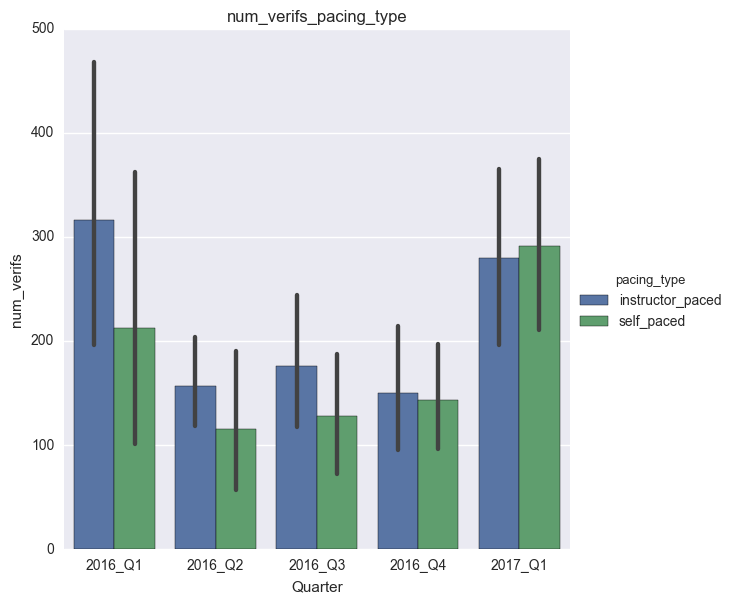

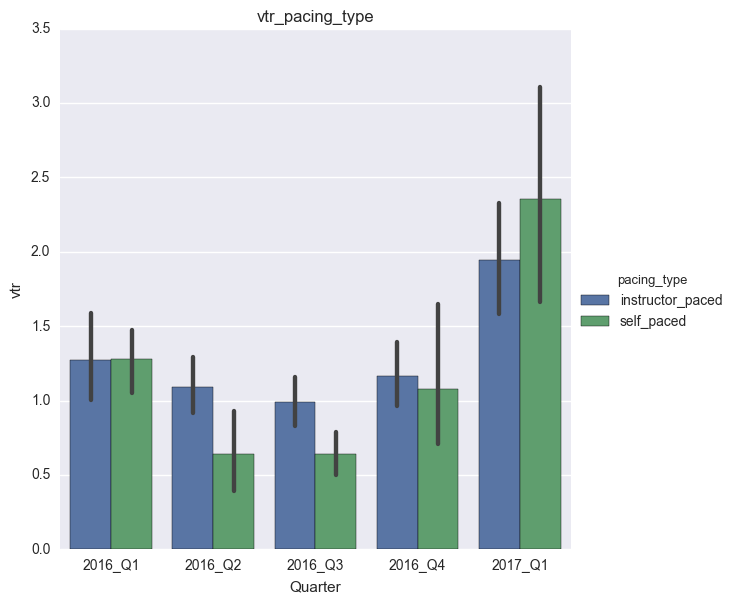

In [311]:
generate_plots('pacing_type')

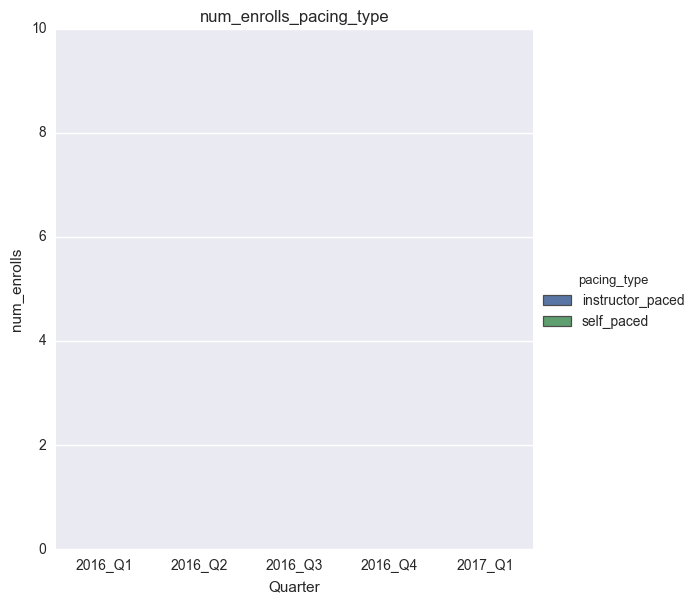

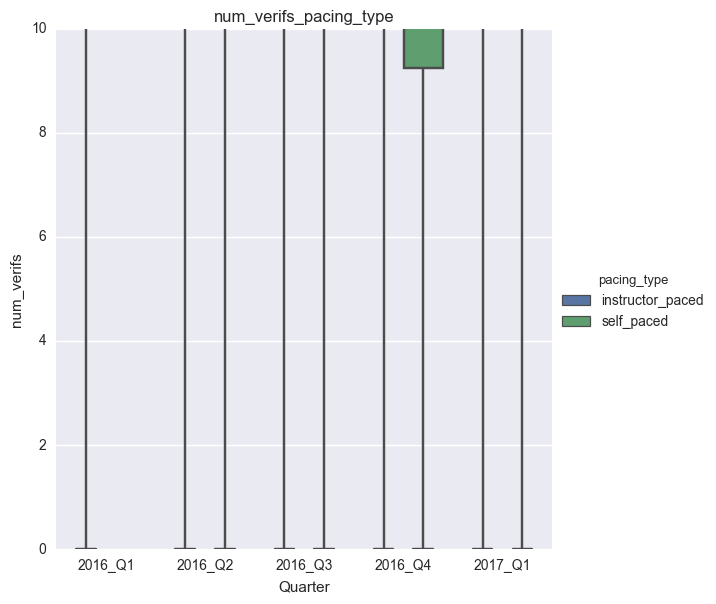

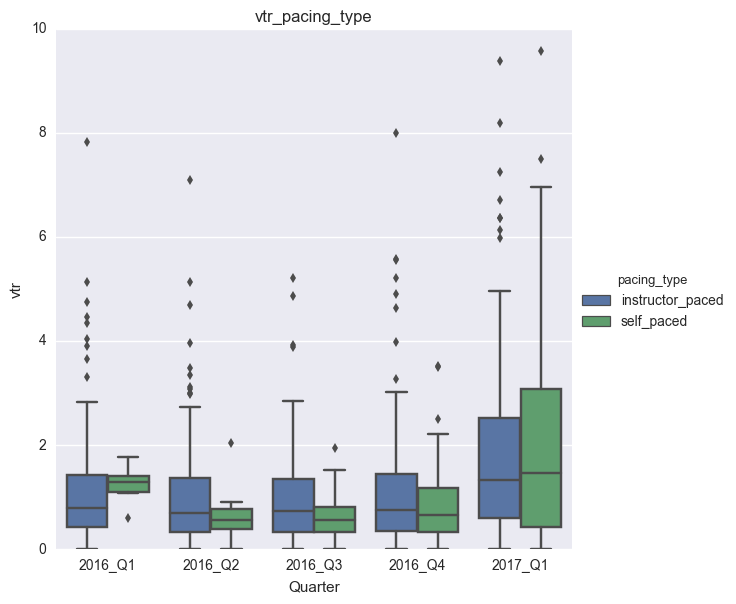

In [11]:
for i in plot_list:
    hue = 'pacing_type'
    ax = sns.factorplot(data = enrollments_quarterly_df, x = 'quarter', y = i, kind = 'box', size = 6, order=order_list, hue=hue)
    ax.set(xlabel='Quarter', ylabel=i, title = (i + '_' + hue), ylim=(0,10))

# With the exception of Q2 2016, enrollments/verifications/vtr are statistically different when comparing self paced vs instructor paced courses

* * *
# Split by Course Level
### What types of courses are people enrolling in more?
* * *

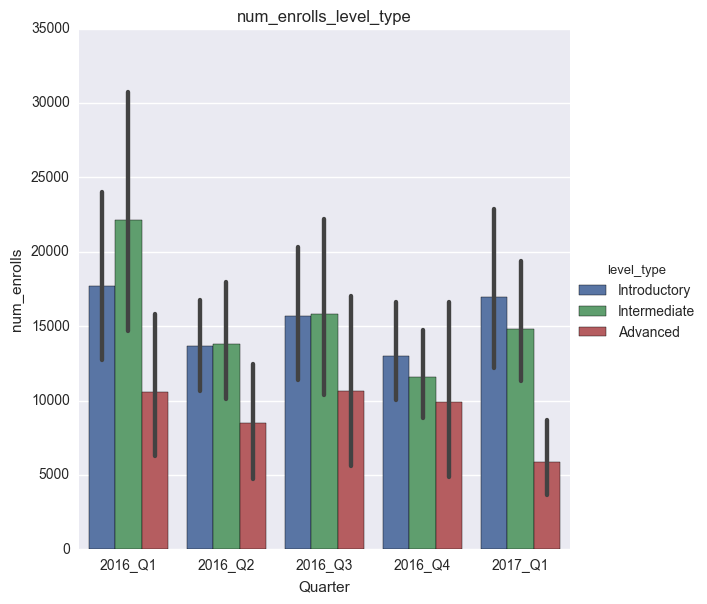

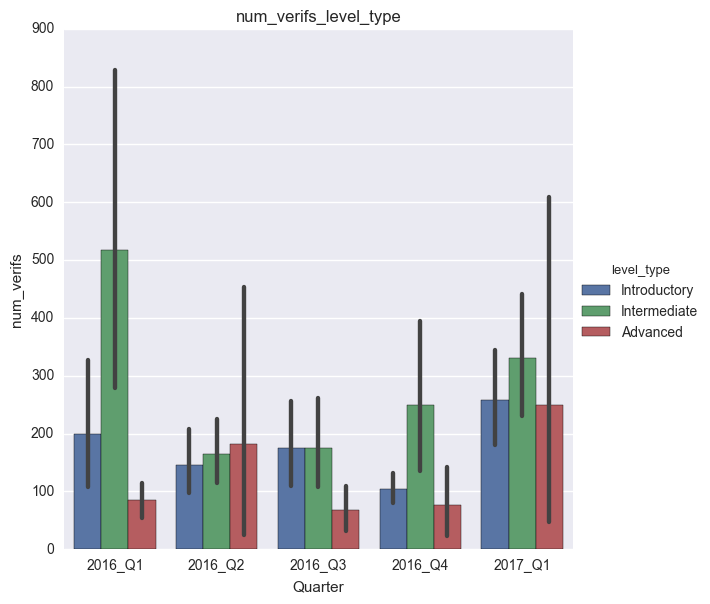

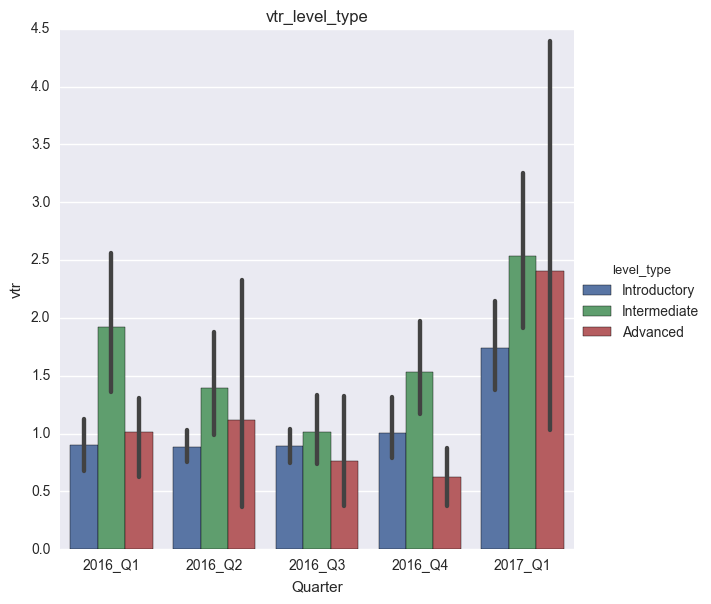

In [312]:
generate_plots('level_type')